In [ ]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tqdm import tqdm
import keras
%matplotlib inline

In [ ]:
#let tired.csv exist(5s)
import pandas as pd
in_csv = 'na_1.csv'
#get the number of lines of the csv file to be read
number_lines = sum(1 for row in (open(in_csv)))
print(number_lines)

3374


In [ ]:
rowsize = 40
cnt=0
for i in range(1,1928,rowsize):
    df = pd.read_csv(in_csv,
          header=None,
          nrows = rowsize,
          skiprows = i)
    out_csv = 'normalstatefolder/nor' + str(cnt) + '.csv'
    cnt=cnt+1
    df.to_csv(out_csv,
          index=False,
          header=False,
          mode='a',#append data to csv file
          chunksize=rowsize)#size of data to append for each loop

In [ ]:
rowsize = 40
print(cnt)
for i in range(1929,number_lines,rowsize):
    df = pd.read_csv(in_csv,
          header=None,
          nrows = rowsize,
          skiprows = i)
    out_csv = 'tiredstatefolder/nor' + str(cnt) + '.csv'
    cnt=cnt+1
    df.to_csv(out_csv,
          index=False,
          header=False,
          mode='a',#append data to csv file
          chunksize=rowsize)#size of data to append for each loop

49


In [ ]:
import os

In [ ]:
%cd normalstatefolder/

/content/normalstatefolder


  0%|          | 0/49 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  if __name__ == '__main__':
 29%|██▊       | 14/49 [00:03<00:11,  3.12it/s]

         theta
0    92.096616
1    79.704987
2    70.933702
3    65.044640
4    62.969403
5    64.342582
6    67.323990
7    69.797530
8    70.840599
9    73.386519
10   80.914692
11   93.898141
12  114.452014
13  142.715165
14  175.795270
15  208.433783
16  231.711953
17  238.617604
18  225.484394
19  195.473833
20  156.496258
21  122.620700
22  102.446967
23  102.572137
24  120.930476
25  146.197422
26  165.448680
27  171.486158
28  163.681442
29  151.030779
30  143.908023
31  151.677715
32  177.166827
33  218.408665
34  268.290851
35  315.828748
36  354.036567
37  376.281383
38  381.135642
39  370.120980
9


 31%|███       | 15/49 [00:03<00:11,  2.88it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  if __name__ == '__main__':
100%|██████████| 49/49 [00:32<00:00,  1.50it/s]


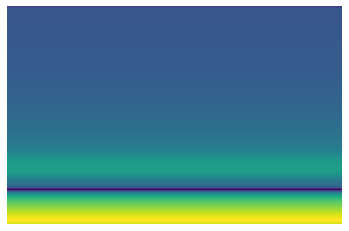

In [ ]:
cnt=0
for filename in tqdm(os.listdir(os.getcwd())):
  realdata = pd.read_csv(filename,header=None,names=['time','theta'])
  realdata=realdata.drop('time',axis=1)
  cnt=cnt+1
  arr=realdata.to_numpy()
  arr=arr.squeeze(1)
  plt.axis('off')
  plt.specgram(arr,Fs=8)
  if cnt==15:
    print(realdata)
    print(os.path.splitext(filename)[0][3:])
  plt.savefig('../normalimg/nor'+os.path.splitext(filename)[0][3:]+'.png', bbox_inches='tight', pad_inches=0)
  #spectrogram[int(os.path.splitext(filename)[0][3:])-1]=

In [ ]:
%cd ..
%cd tiredstatefolder

/content
/content/tiredstatefolder


  0%|          | 0/37 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  if __name__ == '__main__':
 38%|███▊      | 14/37 [00:03<00:07,  3.06it/s]

          theta
0    373.512616
1    349.694498
2    304.272706
3    255.701134
4    222.768942
5    207.922535
6    203.952782
7    197.338814
8    181.329784
9    161.040335
10   146.554370
11   141.441976
12   146.024771
13   162.156785
14   189.495164
15   279.444982
16   507.102075
17   938.232944
18  1534.365821
19  2173.768760
20  2658.776932
21  2823.237732
22  2614.251184
23  2079.716084
24  1417.676124
25   798.013709
26   378.509400
27   157.101222
28   100.079703
29   115.334468
30   156.700203
31   204.109761
32   250.177066
33   279.986809
34   303.309774
35   321.245155
36   340.236524
37   356.895561
38   357.193169
39   338.367834
63


 41%|████      | 15/37 [00:03<00:07,  2.79it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  if __name__ == '__main__':
 57%|█████▋    | 21/37 [00:06<00:08,  1.94it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=5).
  if __name__ == '__main__':
100%|██████████| 37/37 [00:19<00:00,  1.91it/s]


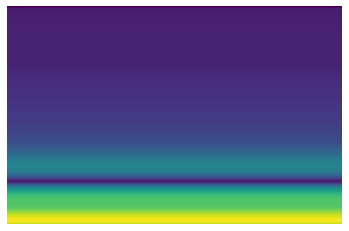

In [ ]:
cnt=0
for filename in tqdm(os.listdir(os.getcwd())):
  realdata = pd.read_csv(filename,header=None,names=['time','theta'])
  realdata=realdata.drop('time',axis=1)
  cnt=cnt+1
  arr=realdata.to_numpy()
  arr=arr.squeeze(1)
  plt.axis('off')
  plt.specgram(arr,Fs=0.05)
  if cnt==15:
    print(realdata)
    print(os.path.splitext(filename)[0][3:])
  plt.savefig('../tiredimg/nor'+os.path.splitext(filename)[0][3:]+'.png', bbox_inches='tight', pad_inches=0)
  #spectrogram[int(os.path.splitext(filename)[0][3:])-1]=

In [ ]:
%cd ..
%cd normalimg

/content
/content/normalimg


In [ ]:
IMAGE_SIZE = (150, 150)

In [ ]:
output = []
images = []
labels = []
for filename in tqdm(os.listdir(os.getcwd())):
  label=0
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMAGE_SIZE) 
  images.append(image)
  labels.append(label)

100%|██████████| 49/49 [00:00<00:00, 476.03it/s]


In [ ]:
%cd ..
%cd tiredimg

/content
/content/tiredimg


In [ ]:
for filename in tqdm(os.listdir(os.getcwd())):
  label=1
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMAGE_SIZE) 
  images.append(image)
  labels.append(label)

100%|██████████| 37/37 [00:00<00:00, 736.10it/s]


In [ ]:
images=np.array(images)

In [ ]:
images.shape

(86, 150, 150, 3)

In [ ]:

images = images.astype("float32")
images /= 255.

In [ ]:
labels=np.array(labels)
labels.shape

(86,)

In [ ]:
labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, test_size=0.20, random_state=1)

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                      

In [ ]:
from tensorflow.keras import optimizers
epochs = 10
batch_size = 128
lr = 0.001
decay = 1e-6

optimizer = optimizers.RMSprop(lr=lr, decay=decay)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    np.array(X_train), 
    np.array(y_train), 
    batch_size=batch_size, 
    epochs=epochs, validation_data=(np.array(X_test), np.array(y_test)), 
    shuffle=True, 
    verbose=2
)

Epoch 1/10
1/1 - 9s - loss: 32.0450 - accuracy: 0.4118 - val_loss: 0.6930 - val_accuracy: 0.5000 - 9s/epoch - 9s/step
Epoch 2/10
1/1 - 8s - loss: 0.6875 - accuracy: 0.6912 - val_loss: 0.6947 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 3/10
1/1 - 8s - loss: 0.6807 - accuracy: 0.5882 - val_loss: 0.6981 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 4/10
1/1 - 8s - loss: 0.6933 - accuracy: 0.5735 - val_loss: 0.6931 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 5/10
1/1 - 8s - loss: 0.6875 - accuracy: 0.5588 - val_loss: 0.6902 - val_accuracy: 0.5556 - 8s/epoch - 8s/step
Epoch 6/10
1/1 - 8s - loss: 0.6731 - accuracy: 0.6029 - val_loss: 0.7029 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 7/10
1/1 - 8s - loss: 0.6953 - accuracy: 0.5882 - val_loss: 0.6864 - val_accuracy: 0.6111 - 8s/epoch - 8s/step
Epoch 8/10
1/1 - 8s - loss: 0.6892 - accuracy: 0.4559 - val_loss: 0.6934 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 9/10
1/1 - 8s - loss: 0.6821 - accuracy: 0.6176 - val_los

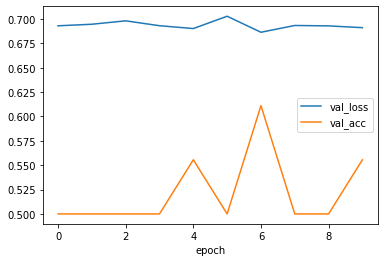

In [ ]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_acc'])
plt.savefig('trashval.png')

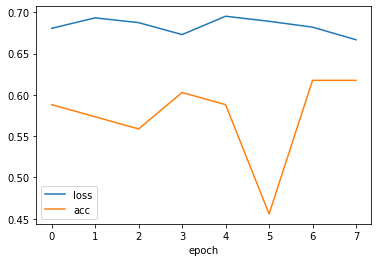

In [ ]:
plt.plot(history.history['loss'][2:],label='loss')
plt.plot(history.history['accuracy'][2:],label='accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'])
plt.savefig('trash.png')

--------------------1D CNN---------------

In [78]:
#let tired.csv exist(5s)
import pandas as pd
in_csv = 'no_2.csv'
#get the number of lines of the csv file to be read
number_lines = sum(1 for row in (open(in_csv)))
print(number_lines)

3610


In [79]:
realdata = pd.read_csv(in_csv,header=None,names=['time','theta'])
realdata=realdata.drop('time',axis=1)
arr=realdata.to_numpy()
arr=arr.squeeze(1)

In [80]:
bat_length=40

In [81]:
cp=2062
cp2=2072

In [82]:
data=[]
labels=[]
for i in range (0,cp):
  data.append(arr[i:i+bat_length])
  labels.append(0)
for i in range(cp2,number_lines-bat_length):
  data.append(arr[i:i+bat_length])
  labels.append(1)

In [ ]:
#labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=0.20, random_state=1)

In [84]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [85]:
labels[1]

0

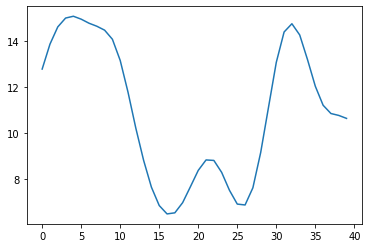

In [ ]:
plt.plot(X_train[2])

In [86]:
y_train[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [88]:
embedding_dim = 256
dropout_ratio = 0.3
num_filters = 256
kernel_size = 3
hidden_units = 128
vocab_size=33740

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         8637440   
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 256)         196864    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [90]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [91]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 4, validation_data = (X_test, y_test), callbacks=[es, mc])

Epoch 1/4
89/89 [==============================] - ETA: 0s - loss: 0.4666 - acc: 0.7855
Epoch 00001: val_acc improved from -inf to 0.98596, saving model to best_model.h5
89/89 [==============================] - 13s 144ms/step - loss: 0.4666 - acc: 0.7855 - val_loss: 0.1152 - val_acc: 0.9860
Epoch 2/4
89/89 [==============================] - ETA: 0s - loss: 0.0556 - acc: 0.9902
Epoch 00002: val_acc improved from 0.98596 to 1.00000, saving model to best_model.h5
89/89 [==============================] - 13s 143ms/step - loss: 0.0556 - acc: 0.9902 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 3/4
89/89 [==============================] - ETA: 0s - loss: 0.0123 - acc: 0.9972
Epoch 00003: val_acc did not improve from 1.00000
89/89 [==============================] - 12s 140ms/step - loss: 0.0123 - acc: 0.9972 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 4/4
89/89 [==============================] - ETA: 0s - loss: 0.0040 - acc: 0.9993
Epoch 00004: val_acc did not improve from 1.00000
89/89 [========

In [92]:
res=model.predict(X_train[:10])

In [109]:
X_train.shape

(2848, 40)

In [71]:
X_train[0]

array([206.3526  , 380.833694, 587.947422, 768.483478, 862.843856,
       838.189314, 706.017887, 514.789096, 327.328682, 191.929924,
       123.939587, 106.889224, 108.481592, 105.067802,  90.38024 ,
        68.520362,  46.31989 ,  29.368377,  19.73364 ,  16.045289,
        15.565019,  15.8437  ,  16.757034,  18.138315,  20.49158 ,
        23.342586,  25.906141,  27.375751,  26.892294,  24.522623,
        21.083582,  17.711926,  15.420213,  14.670488,  15.501348,
        17.465825,  19.564149,  21.391941,  22.808575,  24.077868])

In [93]:
result=[]
for r in res:
  if r>5e-1:
    result.append(1)
  else:
    result.append(0)

In [94]:
result

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1]

In [28]:
y_train[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

노강민 학습에 김나림 데이터 넣기

In [55]:
#let tired.csv exist(5s)
import pandas as pd
in2_csv = 'na_1.csv'
#get the number of lines of the csv file to be read
number_lines = sum(1 for row in (open(in2_csv)))
print(number_lines)

3374


In [56]:
realdata2 = pd.read_csv(in_csv,header=None,names=['time','theta'])
realdata2=realdata2.drop('time',axis=1)
arr2=realdata2.to_numpy()
arr2=arr2.squeeze(1)

In [57]:
cp_n=1920
cp_n2=1930

In [58]:
data2=[]
labels2=[]
for i in range (0,cp_n):
  data2.append(arr2[i:i+bat_length])
  labels2.append(0)
for i in range(cp_n2,number_lines-bat_length):
  data2.append(arr2[i:i+bat_length])
  labels2.append(1)

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, labels2, shuffle=True, test_size=0.99, random_state=1)

In [60]:
X_train2[0]

array([ 9.500233,  9.171309,  8.410605,  7.442977,  6.53041 ,  5.978797,
        5.917247,  6.49141 ,  7.698695,  9.32635 , 11.123217, 12.835374,
       14.308576, 15.415013, 16.288113, 16.916796, 17.191111, 16.900758,
       15.94825 , 14.49365 , 13.025842, 12.253571, 12.927161, 15.054062,
       18.840762, 23.375171, 27.533156, 30.776231, 31.926397, 31.666043,
       30.065349, 28.696203, 30.579607, 38.76322 , 53.337026, 70.739238,
       87.27658 , 94.816886, 93.215856, 80.836715])

In [61]:
X_train2=np.array(X_train2)
X_test2=np.array(X_test2)
y_train2=np.array(y_train2)
y_test2=np.array(y_test2)

In [62]:
loss, mse = model.evaluate(X_test2, y_test2, batch_size=1)
print('acc : ', mse)

3291/3291 [==============================] - 9s 3ms/step - loss: 0.4730 - acc: 0.9559
acc :  0.9559404253959656


---이현민 측정---

In [110]:
in3_csv = 'le_1.csv'
#get the number of lines of the csv file to be read
number_lines = sum(1 for row in (open(in3_csv)))
print(number_lines)

5100


In [111]:
realdata3 = pd.read_csv(in3_csv,header=None,names=['time','theta'])
realdata3=realdata3.drop('time',axis=1)
arr3=realdata3.to_numpy()
arr3=arr3.squeeze(1)

In [112]:
cnt=0
testdata=[]
for i in range(0,number_lines-bat_length):
  testdata.append(arr3[i:i+bat_length])
testdata[0]
testdata=np.array(testdata)

In [113]:
X_train3, X_test3= train_test_split(testdata, shuffle=True, test_size=0.99, random_state=1)

In [114]:
X_test3=np.array(X_test3)

In [115]:
X_test3.shape

(5010, 40)

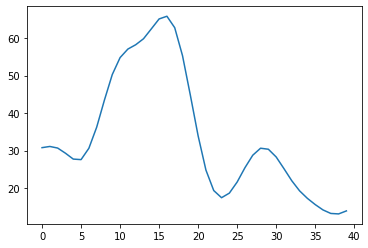

In [116]:
plt.plot(X_test3[0])

In [117]:
res=model.predict(X_test3)

In [120]:
result=[]
cnt=0
how=0
for r in res:
  cnt=cnt+1
  if r>5e-1:
    result.append(1)
    how=how+1
  else:
    result.append(0)

In [122]:
1-how/cnt

0.6075848303393214

In [ ]:
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

[0.5038845539093018, 0.06930586695671082, 0.01364158745855093, 0.0041107130236923695, 0.002175786765292287, 0.0012536223512142897, 0.0010405104840174317, 0.0005165446782484651, 0.00043668327271007, 0.0005708715762011707]
[0.7492977380752563, 0.9827949404716492, 0.997542142868042, 0.9996488690376282, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.13639649748802185, 0.01508862804621458, 0.0029445020481944084, 0.0012830012710765004, 0.0008874046616256237, 0.0005887983716093004, 0.0003798680554609746, 0.0003495957935228944, 0.00025297372485511005, 0.00048479100223630667]
[0.9859550595283508, 0.9985954761505127, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


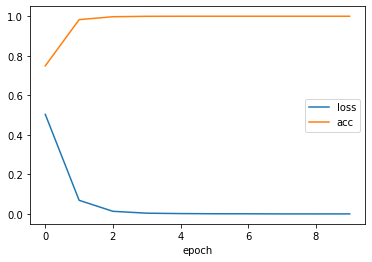

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='acc')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'])
plt.savefig('good.png')

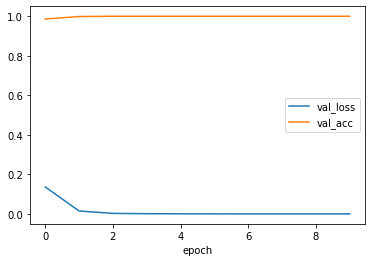

In [ ]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_acc'],label='val_acc')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_acc'])
plt.savefig('goodval.png')

In [ ]:
1

-----------------mel re-----------------

In [ ]:
eeg = pd.read_csv('na_1.csv', sep=',', parse_dates=[0], header=None,
                  names=['timestamp', 'raw'])

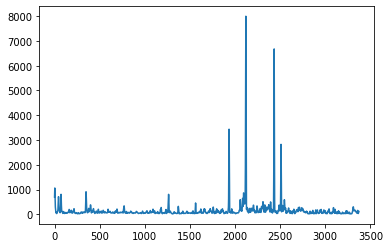

In [ ]:
plt.plot(eeg['raw'])
plt.savefig('eegplt.png')

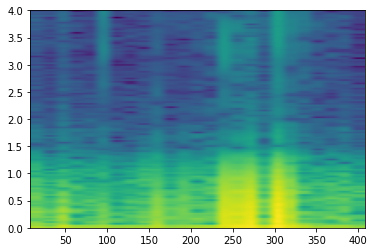

In [ ]:
plt.specgram(eeg['raw'], Fs=8)
plt.savefig('eegspec.png')